<a href="https://colab.research.google.com/github/Paulo-tech1/Trabalho-em-R-analise-Petrobras/blob/main/Trabalho_01_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   Nomes: Paulo Roberto Ferreria Costa
*   Matricula: 2020100533
*   Trabalho da Disciplina de Programação em R da Pós Graduação de Ciência de Dados da Unicarioca
*   professor da disciplina: Sérgio Monteiro, DSc

In [3]:
# Instalação de pacotes no R
install.packages("quantmod")  # Pacote para análise financeira
install.packages("TTR")       # Pacote para indicadores técnicos
install.packages("ggplot2")   # Pacote para visualizações avançadas


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
# Carregar os pacotes
library(quantmod)
library(TTR)
library(ggplot2)


#Obter Dados da Petrobras (PETR4.SA)

In [5]:
# Obter dados da PETR4.SA do Yahoo Finance
getSymbols("PETR4.SA", src = "yahoo", from = "2020-01-01", to = Sys.Date())

# Armazenar os dados de fechamento ajustado
petr4_data <- Cl(PETR4.SA)


[1] "PETR4.SA"

# Análise de Padrões de Candlestick

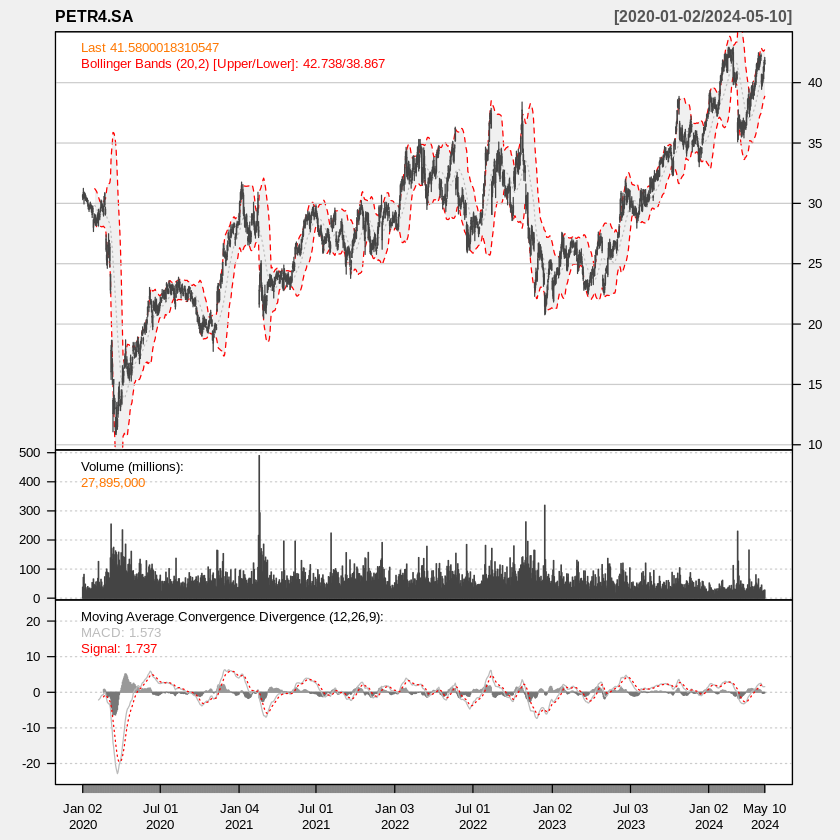

In [6]:
# Gráfico de candlestick para PETR4.SA
candleChart(PETR4.SA, theme = chartTheme("white"), TA = "addVo(); addBBands(); addMACD()")


#  Histogramas para Distribuição de Retornos

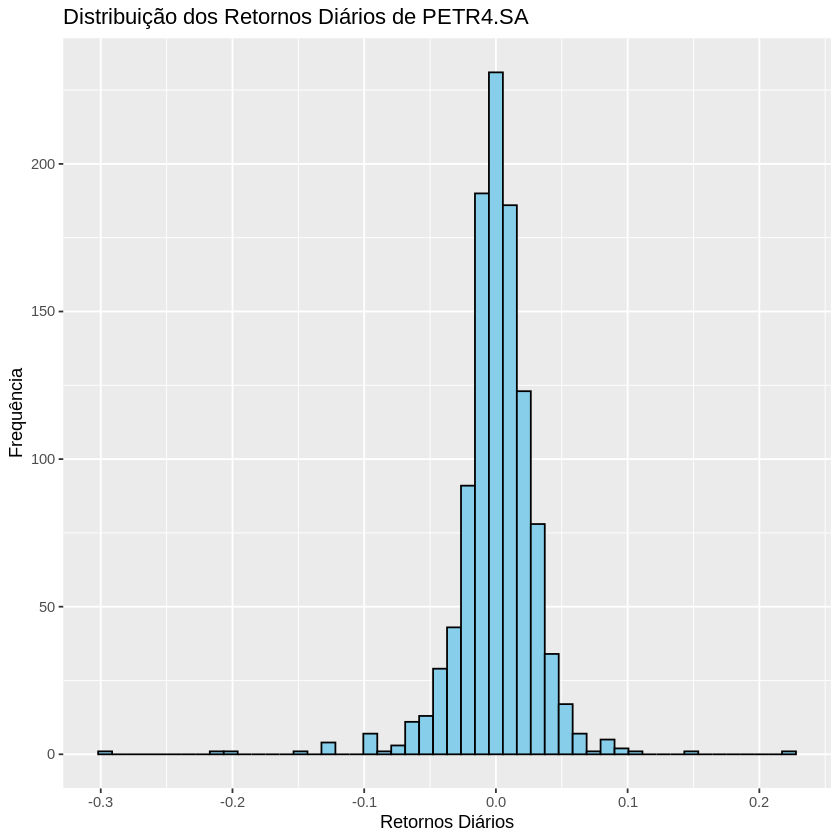

In [7]:
# Calcular retornos diários
retornos <- dailyReturn(PETR4.SA)

# Plotar um histograma para visualizar a distribuição dos retornos
ggplot(as.data.frame(retornos), aes(x = daily.returns)) +
  geom_histogram(bins = 50, fill = "skyblue", color = "black") +
  ggtitle("Distribuição dos Retornos Diários de PETR4.SA") +
  xlab("Retornos Diários") +
  ylab("Frequência")


# Estudo de Tendências com Médias Móveis e Linhas de Tendência

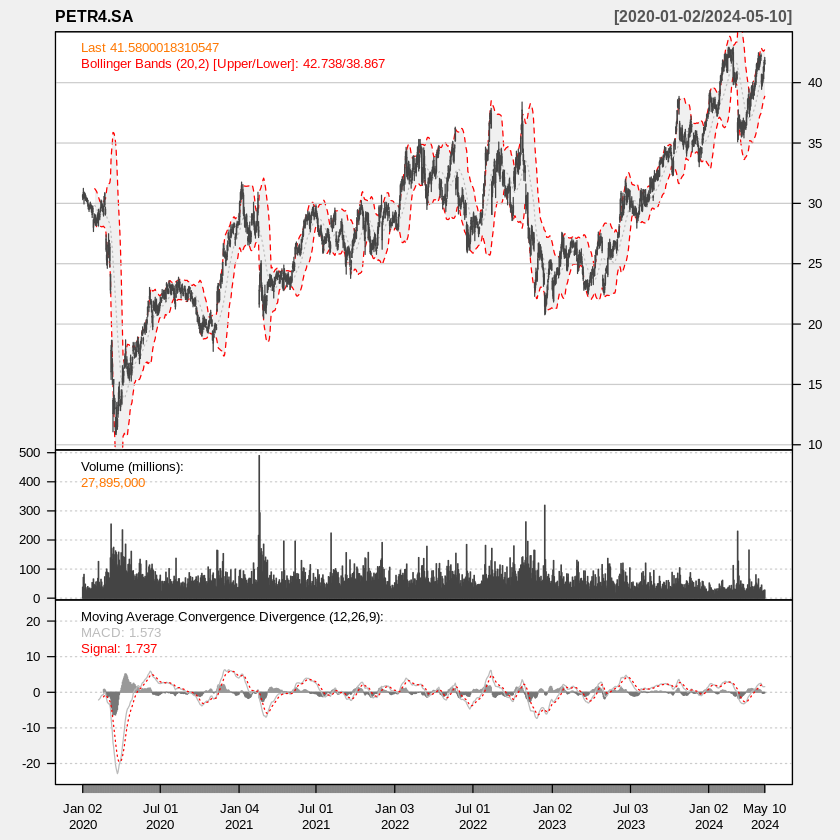

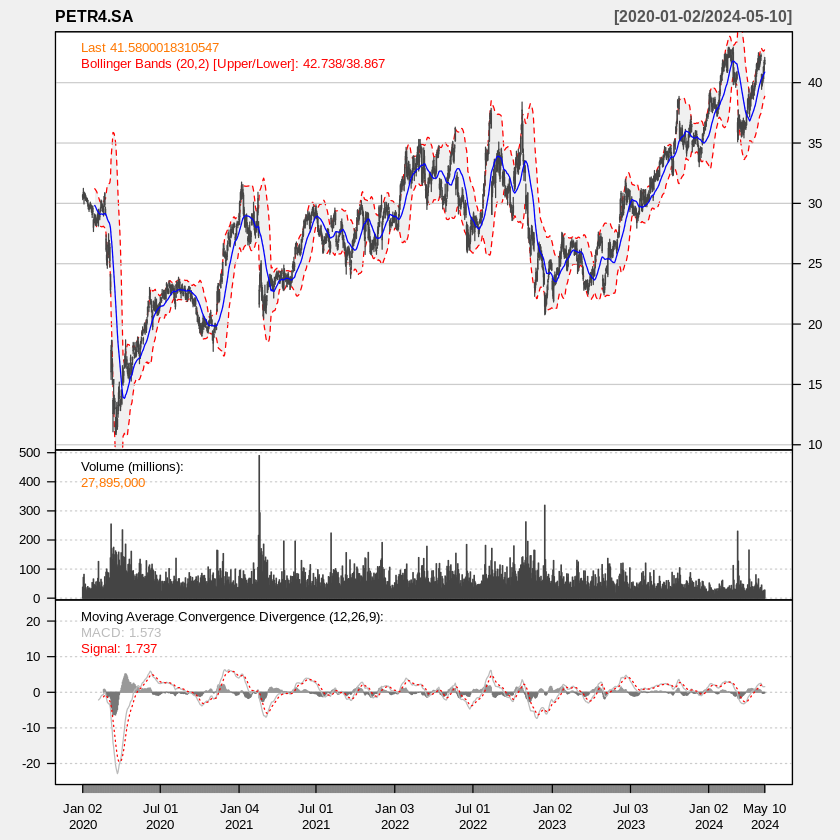

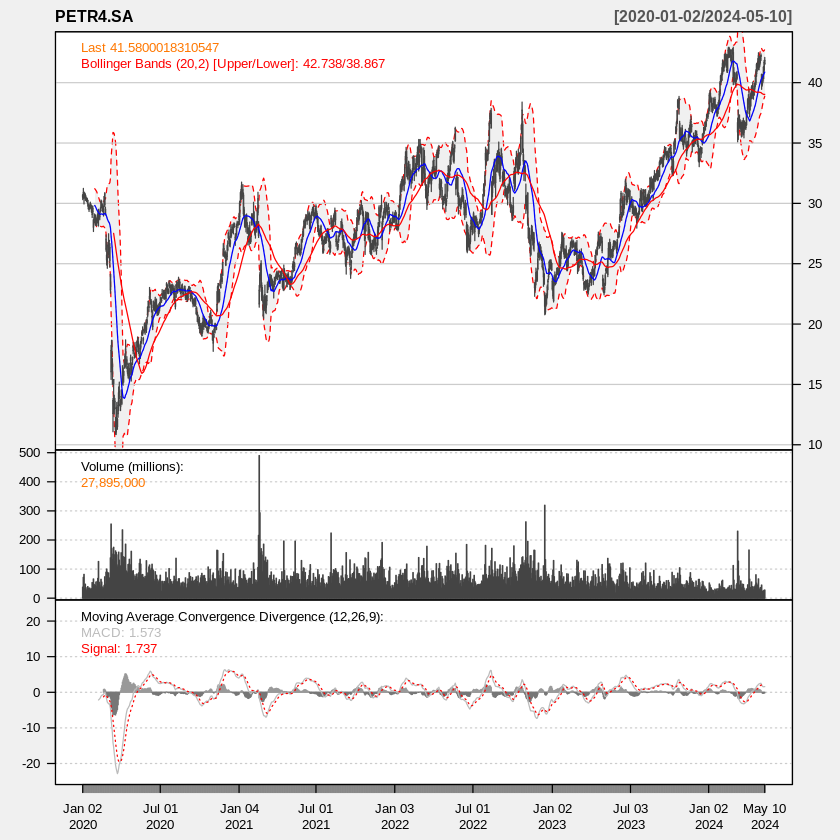

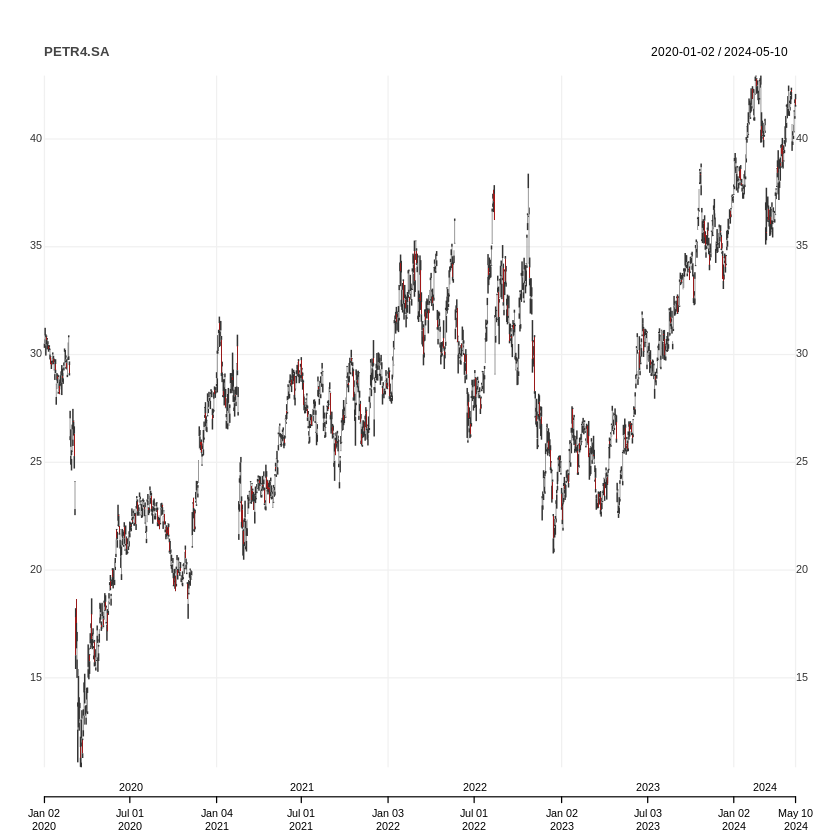

In [9]:
#Gráfico  de candlestick
candleChart(PETR4.SA, theme = chartTheme("white"), TA = "addVo(); addBBands(); addMACD()")

# Adicionar médias móveis ao gráfico
addSMA(n = 20, col = "blue")  # Média Móvel de 20 períodos
addSMA(n = 50, col = "red")   # Média Móvel de 50 períodos

# Usar funções de plotagem para adicionar uma linha de tendência
chart_Series(PETR4.SA)
segments(x0 = as.numeric(index(PETR4.SA[1])), y0 = 19.5,
         x1 = as.numeric(index(PETR4.SA[10])), y1 = 28,
         lty = 2, col = "red")
